In [3]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sp

import collections
from collections import Counter
from statistics import mean #per la media

from grafici import htlc_distribution, feebase_distribution, feerate_distribution, double_hist_fee

In [4]:
#leggo il grafo dal file .gml 
#ln = nx.read_gml('output\grafi\grafodef.gml')

ln = nx.read_gml('output\grafi\multigrafo.gml')

In [3]:
numnodi = ln.number_of_nodes()
numarchi = ln.number_of_edges()

print(numnodi)
print(numarchi)

11044
42974


# ***ANALISI DISTRIBUZIONI FEE***

### *Def:*
### **min_htcl:** *valore minimo (espresso in msat) per cui un nodo è disposto a fare il forward di un pagamento*
### **fee_base:**  *tariffa fissa (espressa in mSat) addebitata su ogni transazione instradata attraverso un certo nodo*
### **fee_rate:** : *millisatoshi aggiuntivi richiesti per ogni milione di satoshi inviati*



In [29]:
#per calcolare le distribuzioni

htlc1 = [int(c) for (u, v, c) in ln.edges.data('MINHTLC1') ]
htlc2 = [int(c) for (u, v, c) in ln.edges.data('MINHTLC2')]
htlc = htlc1+htlc2 
feebase1 = [c for (u, v, c) in ln.edges.data('FEEBASE1')]
feebase2 = [c for (u, v, c) in ln.edges.data('FEEBASE2')]
feebase = feebase1 + feebase2
feerate1 = [int(c) for (u, v, c) in ln.edges.data('FEERATE1')]
feerate2 = [int(c) for (u, v, c) in ln.edges.data('FEERATE2')]
feerate = feerate1 + feerate2

In [30]:
htlccounter = collections.Counter(htlc)
feebasecounter = collections.Counter(feebase)
fee2 = collections.Counter(feerate2)
feeratecounter = collections.Counter(feerate)

### **HTLC**

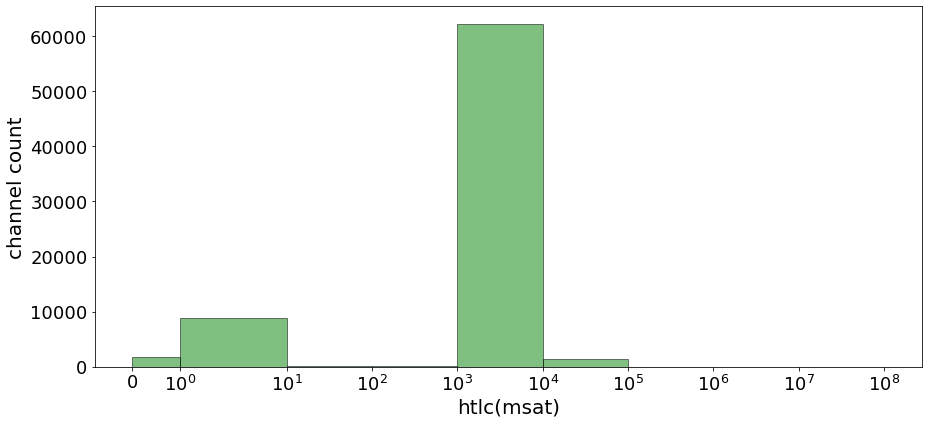

In [31]:
#calcolo istogramma della distrubuzione dei valori di htlc
htlc_distribution(htlc)
#plt.savefig('output\immg\htlc.png')

In [8]:
#percentuali htlc nei canali 

zero = 0
uno = 0
dieci = 0
cento = 0
mille = 0
centok = 0
milione = 0
dieciM = 0
centoM = 0


for key in htlccounter.keys():
    #if int(key) <= 0 :
    #    zero += htclcounter[key]
    if int(key) <= 1 and int(key) >= 0:
        uno += htlccounter[key]
    if int(key) <= 10 :
        dieci += htlccounter[key]
    if int(key) <= 100 :
        cento += htlccounter[key]
    if int(key) == 1000 :
        mille += htlccounter[key]
#   if int(key) <= 10000 :
#       diecimila += htclcounter[key]
    if int(key) <= 100000 :
        centok += htlccounter[key]
    if int(key) <= 1000000 :
        milione+= htlccounter[key]
    if int(key) <= 10000000 :
        dieciM+= htlccounter[key] 
    if int(key) <= 100000000 :
        centoM+= htlccounter[key]
        
print("La percentuale di canali con minhtlc <= 1 è ", str(round(uno*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 10 è ", str(round(dieci*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 100 è ", str(round(cento*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 1000 è ", str(round(mille*100/len(htlc),3)), "%")
#print("La percentuale di canali con minhtcl <= 10000 è ", str(round(diecimila*100/len(htcl1),3)), "%")
print("La percentuale di canali con minhtlc <= 100000 è ", str(round(centok*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 1000000 è ", str(round(milione*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 10000000 è ", str(round(dieciM*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 100000000 è ", str(round(centoM*100/len(htlc),3)), "%")


La percentuale di canali con minhtlc <= 1 è  12.359 %
La percentuale di canali con minhtlc <= 10 è  25.574 %
La percentuale di canali con minhtlc <= 100 è  25.723 %
La percentuale di canali con minhtlc <= 1000 è  72.424 %
La percentuale di canali con minhtlc <= 100000 è  99.948 %
La percentuale di canali con minhtlc <= 1000000 è  99.979 %
La percentuale di canali con minhtlc <= 10000000 è  99.994 %
La percentuale di canali con minhtlc <= 100000000 è  100.0 %


### **FEE_BASE**

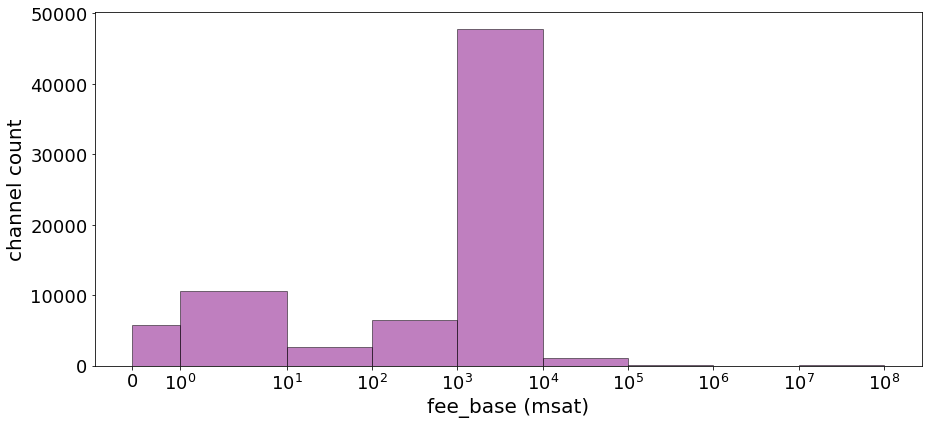

In [32]:
feebase_distribution(feebase)
#plt.savefig('feebase.png')


In [14]:
uno = 0
dieci = 0
cento = 0
mille = 0
diecik = 0
centok = 0
milione = 0
dieciM = 0
centoM = 0
miliardo = 0

for key in feebasecounter.keys():
    if int(key) <= 1 :
        uno += feebasecounter[key]
    if int(key) <= 10 :
        dieci += feebasecounter[key]
    if int(key) <= 100 :
        cento += feebasecounter[key]
    if int(key) <= 1000 :
        mille += feebasecounter[key]
    if int(key) <= 100000 :
        centok += feebasecounter[key]
    if int(key) <= 1000000 :
        milione += feebasecounter[key]
    if int(key) <= 10000000 :
        dieciM += feebasecounter[key]
    if int(key) <= 100000000:
        centoM += feebasecounter[key]
    if int(key) <= 1000000000 :
        miliardo += feebasecounter[key]
        
        
print("La percentuale di canali con feebase <= 1 è ", str(round(uno*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 10 è ", str(round(dieci*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 100 è ", str(round(cento*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000 è ", str(round(mille*100/len(feebase),3)), "%")
#print("La percentuale di canali con feebase <= 10000 è ", str(round(diecimila*100/len(feerate),3)), "%")
print("La percentuale di canali con feebase <= 100000 è ", str(round(centok*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000000 è ", str(round(milione*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 10000000 è ", str(round(dieciM*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 100000000 è ", str(round(centoM*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000000000 è ", str(round(miliardo*100/len(feebase),3)), "%")

La percentuale di canali con feebase <= 1 è  31.271 %
La percentuale di canali con feebase <= 10 è  33.538 %
La percentuale di canali con feebase <= 100 è  37.188 %
La percentuale di canali con feebase <= 1000 è  93.322 %
La percentuale di canali con feebase <= 100000 è  99.874 %
La percentuale di canali con feebase <= 1000000 è  99.908 %
La percentuale di canali con feebase <= 10000000 è  99.967 %
La percentuale di canali con feebase <= 100000000 è  99.97 %
La percentuale di canali con feebase <= 1000000000 è  100.0 %


### **FEE_RATE**

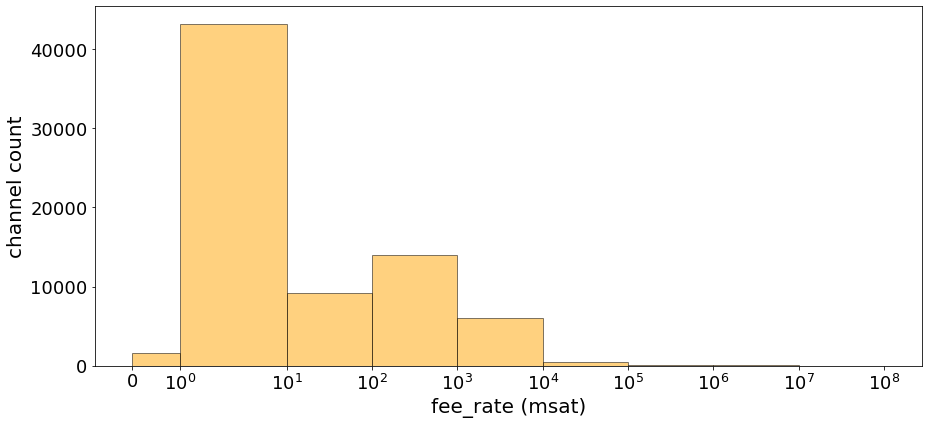

In [33]:
feerate_distribution(feerate)
#plt.savefig('feerate.png')

In [18]:
uno = 0
dieci = 0
cento = 0
mille = 0
diecik = 0
centok = 0
milione = 0
dieciM = 0
miliardo = 0

for key in feeratecounter.keys():
    if int(key) <= 1 :
        uno += feeratecounter[key]
    if int(key) <= 10 :
        dieci += feeratecounter[key]
    if int(key) <= 100 :
        cento += feeratecounter[key]
    if int(key) <= 1000 :
        mille += feeratecounter[key]
    if int(key) <= 10000 :
        diecik += feeratecounter[key]
    if int(key) <= 100000 :
        centok += feeratecounter[key]
    if int(key) <= 1000000 :
        milione += feeratecounter[key]
    if int(key) <= 10000000 :
        dieciM += feeratecounter[key]
    if int(key) <= 1000000000 :
        miliardo += feeratecounter[key]
        
        
print("La percentuale di canali con feerate <= 1 è ", str(round(uno*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10 è ", str(round(dieci*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 100 è ", str(round(cento*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000 è ", str(round(mille*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10000 è ", str(round(diecik*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 100000 è ", str(round(centok*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000000 è ", str(round(milione*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10000000 è ", str(round(dieciM*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000000000 è ", str(round(miliardo*100/len(feerate),3)), "%")

La percentuale di canali con feerate <= 1 è  63.441 %
La percentuale di canali con feerate <= 10 è  68.719 %
La percentuale di canali con feerate <= 100 è  79.275 %
La percentuale di canali con feerate <= 1000 è  96.043 %
La percentuale di canali con feerate <= 10000 è  99.465 %
La percentuale di canali con feerate <= 100000 è  99.881 %
La percentuale di canali con feerate <= 1000000 è  99.95 %
La percentuale di canali con feerate <= 10000000 è  99.962 %
La percentuale di canali con feerate <= 1000000000 è  99.998 %


# ***ROOTS***

In [6]:
root_prop= {} #struttura per memorizzare i nodi radice e le loro proprietà

all_nodes = [node for node in ln.nodes() if ln.degree(node) >= 5]

for node in all_nodes:
    roses = [rose for rose in ln.neighbors(node) if ln.degree(rose) == 1]

    #for n in ln.neighbors(node): #scorro i vicini

    if len(roses) >= 3: #se almeno un vicino è una rosa avrò nel dict "root_prop" un campo relativo al nodo node
        root_prop[node] = {'degree': int, 'roses': [], 'blue': [], 'percent_roses': int } 
    
for node in root_prop.keys():
    for n in ln.neighbors(node): 
        if ln.degree(n) == 1:
            root_prop[node]['roses'].append(n) #roses contiene i vicini che sono rose (grado=1)
        else:
            root_prop[node]['blue'].append(n) #blue contiene i vicini che non sono rose (grado >1)
                
    
    root_prop[node]['degree'] = (ln.degree(node))
    #percent_roses rappresenta in percentuale la proporzione di rose a cui il nodo è collegato rispetto ai nodi blue
    root_prop[node]['percent_roses']=(float(len(root_prop[node]['roses']) / ln.degree(node) * 100)) 

print(len(root_prop))

173


In [61]:
#memorizzo la componente principale
largest_component = ln.subgraph(max(nx.connected_components(ln),key=len))
nx.write_gml(largest_component, "output\grafi\largest_component.gml") 
#ln_largest = nx.read_gml("largest_component.gml")

In [64]:
#percentuale dei nodi root nella largest_component
#perc_roots_largest = int(len(root_prop_largest) / len(root_prop) * 100)
#print("Il ", perc_roots_largest, " % dei nodi radice si trova nella componente centrale. ")


#percentuale dei nodi root sul totale:
perc_roots = int(len(root_prop) / ln.number_of_nodes() * 100)
print("I nodi root sono il ",perc_roots,"% dei nodi totali")

I nodi root sono il  1 % dei nodi totali


### ***Aggiungo attributo 'ISROOT' ai nodi radice per visualizzazione con graphia***

In [7]:
#?
#memorizzo i nodi che sono collegati a più nodi rossi (rose) che blu
selected_nodes = {}

for node in root_prop.keys():
    if(root_prop[node]['percent_roses'] > 40 ):#and largest_component.degree(node) >=4 ):
        selected_nodes[node]= root_prop[node]

In [9]:
#individuare altri nodi radice (??) collegati solo a rose oppure ad altri nodi roots
bouquet_roots = {}

for node in ln.nodes():
    #memorizzo i vicini che sono nodi root
    neigh = [nbr for nbr in ln.neighbors(node) if nbr in root_prop.keys()]

    #se il nodo n è collegato ad almeno un nodo root
    if(node not in root_prop.keys() and len(neigh) >= 2 and ln.degree(node)>=5):
        nodes_add = [nd for nd in ln.neighbors(node) if ln.degree(nd) == 1 or nd in neigh] #prova ln.degree(nd) == 2 anche

        if len(nodes_add) == len(list(ln.neighbors(node))):

            bouquet_roots[node] = {'degree': int, 'root_neigh': [], 'roses': [], 'blue': []} 
            
            
for n in bouquet_roots.keys():
    for nb in ln.neighbors(n):
        
        if ln.degree(nb) == 1:
            bouquet_roots[n]['roses'].append(nb) #roses contiene i vicini che sono rose (grado=1)
        elif nb in root_prop.keys():
            bouquet_roots[n]['root_neigh'].append(nb) #contiene i vicini che sono root 
    
    bouquet_roots[n]['degree'] = (ln.degree(n))


display(len(bouquet_roots))



132

In [65]:
all_nodes =  list(root_prop.keys()) + list(bouquet_roots.keys())  #list(selected_nodes.keys())
display(len(all_nodes))

620

In [10]:
node_attr = {}

for node in ln.nodes():
    new = {'ISROOT' : 1 if node in bouquet_roots.keys() else 0}
    node_attr[node] = new
nx.set_node_attributes(ln, node_attr)


nx.write_gml(ln, "output\grafi\grafo_root_all.gml") #grafo ottenuto con l'algoritmo precedente ma la condizione affinchè un nodo sia key della struttura è solo che uno dei suoi vicini abbia grado1

In [ ]:
edges_0 = []
edges_1 = []

for edge in ln.edges(data=True):
    
    if edge[0] in root_prop.keys(): #lo memorizzo nella prima lista così so che devo prendere il primo nodo per le distribuzioni
        edges_0.append(edge)
    elif edge[1] in root_prop.keys(): #lo memorizzo nella seconda lista così so che devo prendere il primo nodo per le distribuzioni
        edges_1.append(edge)

In [92]:
#distribuzioni delle commissioni applicate dai nodi radice 
htlc1_ = [edges_0[i][2]['MINHTLC1'] for i in range(len(edges_0))]
htlc2_ = [edges_1[i][2]['MINHTLC2'] for i in range(len(edges_1))]
htlc_ = htlc1_+htlc2_ 
feebase1_ = [edges_0[i][2]['FEEBASE1'] for i in range(len(edges_0))]
feebase2_ = [edges_1[i][2]['FEEBASE2'] for i in range(len(edges_1))]
feebase_ = feebase1_+ feebase2_
feerate1_ = [edges_0[i][2]['FEERATE1'] for i in range(len(edges_0))]
feerate2_ = [edges_1[i][2]['FEERATE2'] for i in range(len(edges_1))]
feerate_ = feerate1_ + feerate2_

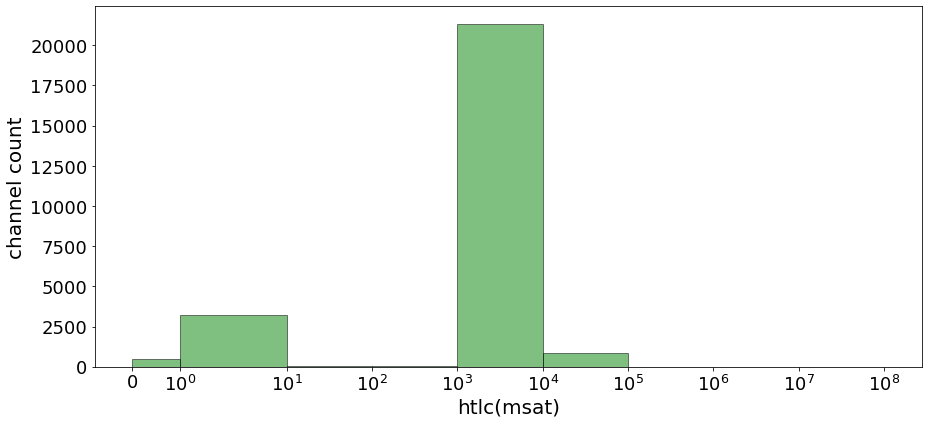

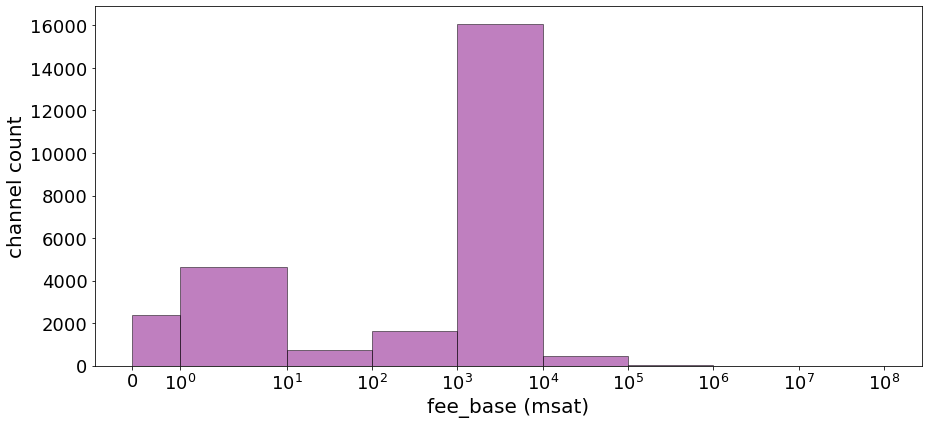

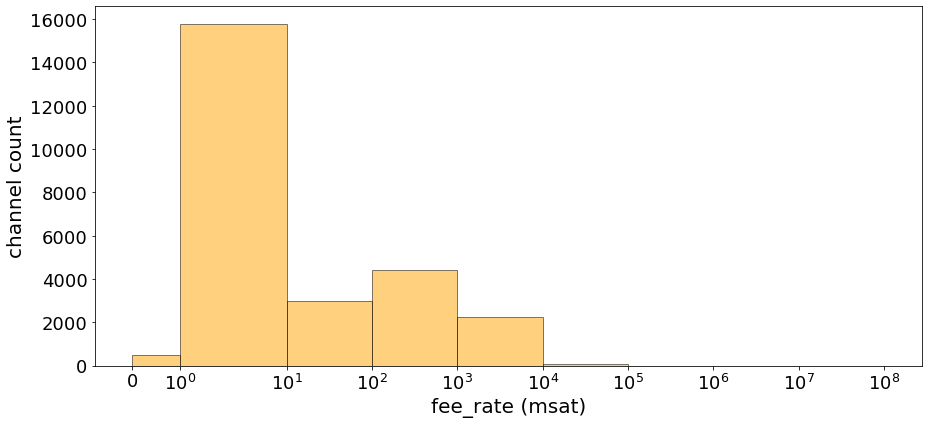

In [91]:
htlc_distribution(htlc_)
feebase_distribution(feebase_)
feerate_distribution(feerate_)

In [26]:
#display(edges_max_degree)
'022c3b4bdf935d254a3b3689f0496b8ca55655bf7c5032664899fec252f993bc5e' in root_prop.keys()

False

In [74]:
#memorizzo i canali dei nodi root con grado >= 200
edges_max_degree = {'canali_uscenti': [], 'canali_incidenti': []}

for node in root_prop.keys():
    if root_prop[node].get('degree') >= 200:
            edges_max_degree['canali_uscenti'] = edges_max_degree['canali_uscenti'] + [edge for edge in ln.edges(data=True) if node == edge[0]]
            edges_max_degree['canali_incidenti'] = edges_max_degree['canali_incidenti'] + [edge for edge in ln.edges(data=True) if node == edge[1]]



In [81]:
#e = edges_max_degree['canali_incidenti'][1][2]['MINHTLC1']
display(edges_max_degree['canali_incidenti'][2][2]['MINHTLC1'])

1000

In [82]:
#display(e)
htlc = [ edges_max_degree['canali_incidenti'][i][2]['MINHTLC1'] for i in range(len(edges_max_degree['canali_incidenti']))]
display(htlc)

[10000,
 1,
 1000,
 10000,
 10000,
 10000,
 1000,
 1000,
 1,
 10000,
 10000,
 1000,
 1000,
 10000,
 0,
 -1,
 0,
 0,
 1000,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1000,
 -1,
 -1,
 10000,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1000,
 1000,
 0,
 0,
 1000,
 0,
 0,
 0,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1,
 1000,
 1000,
 1,
 1000,
 1000,
 1000,
 -1,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 0,
 1000,
 1000,
 -1,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 0,
 1,
 1000,
 1000,
 1000,
 0,
 0,
 0,
 0,
 0,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1,
 1000,
 1000,
 1000,
 1,
 1,
 1,
 0,
 1000,
 1000,
 1,
 1000,
 1000,
 1,
 1000,
 10000,
 1000,
 1000,
 1000,
 1,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1,
 10000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 10000,
 1000,
 1000,
 -1,
 100

In [83]:
#distribuzioni 
htlc1dist = [edges_max_degree['canali_uscenti'][i][2]['MINHTLC1'] for i in range(len(edges_max_degree['canali_uscenti']))]
htlc2dist = [edges_max_degree['canali_incidenti'][i][2]['MINHTLC2'] for i in range(len(edges_max_degree['canali_incidenti']))]
htlcdist = htlc1dist+htlc2dist
feebase1dist = [edges_max_degree['canali_uscenti'][i][2]['FEEBASE1'] for i in range(len(edges_max_degree['canali_uscenti']))]
feebase2dist = [edges_max_degree['canali_incidenti'][i][2]['FEEBASE2'] for i in range(len(edges_max_degree['canali_incidenti']))]
feebasedist = feebase1dist + feebase2dist
feerate1dist = [edges_max_degree['canali_uscenti'][i][2]['FEERATE1'] for i in range(len(edges_max_degree['canali_uscenti']))]
feerate2dist = [edges_max_degree['canali_incidenti'][i][2]['FEERATE2'] for i in range(len(edges_max_degree['canali_incidenti']))]
feeratedist = feerate1dist + feerate2dist

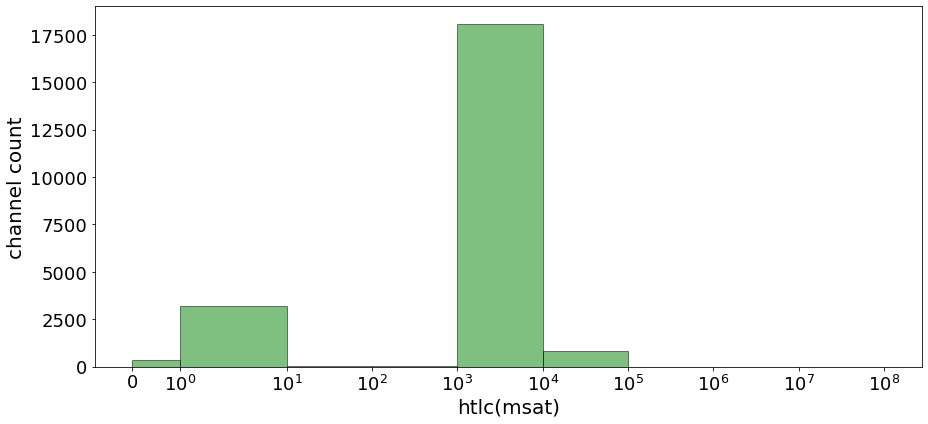

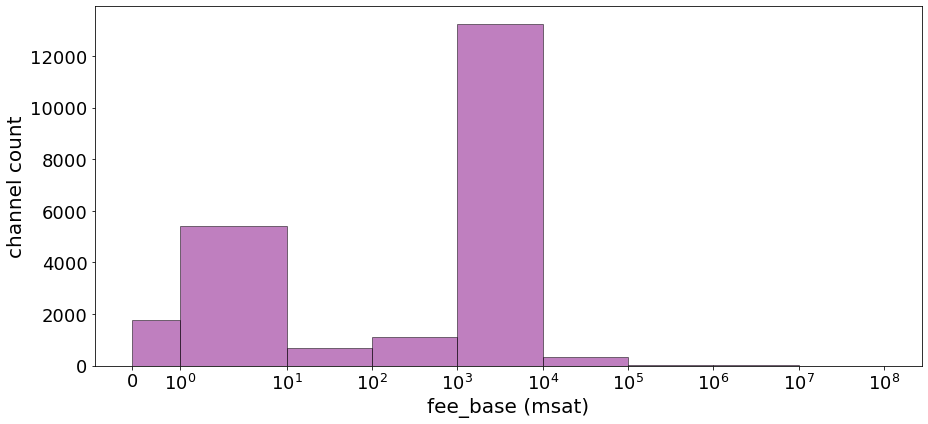

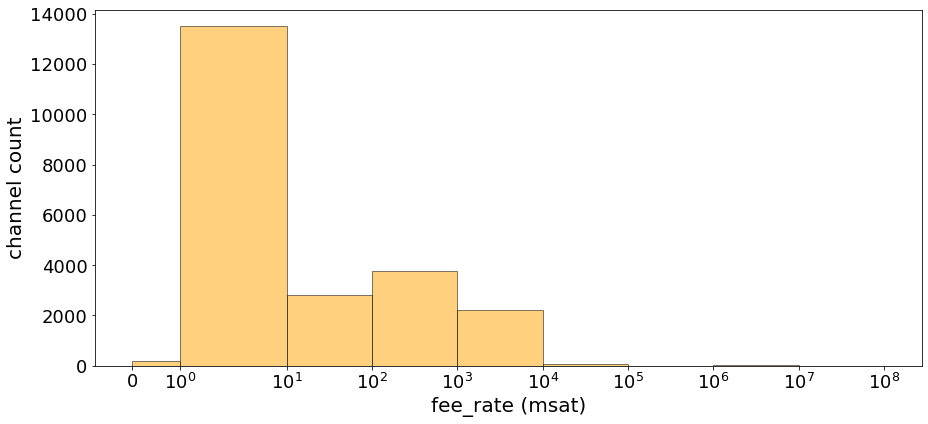

In [89]:
htlc_distribution(htlcdist)
feebase_distribution(feebasedist)
feerate_distribution(feeratedist)

# ***ANALISI CENTRALITA'***



## Trasformo il multigrafo in Grafo, facendo la media delle componenti degli archi

In [5]:
G = nx.Graph()

multi_nodes = []

for edge in ln.edges(data=True,keys=True):

    u = edge[0]
    v = edge[1]

    k = edge[2]

    if not G.has_edge(u,v):

        G.add_edge(u,v)
        
        htlc1 = mean(d.get('MINHTLC1',-1) for d in ln.get_edge_data(u,v).values())
        htlc2 = mean(d.get('MINHTLC2',-1) for d in ln.get_edge_data(u,v).values())
        feebase1 = mean(d.get('FEEBASE1',-1) for d in ln.get_edge_data(u,v).values())
        feebase2 = mean(d.get('FEEBASE2',-1) for d in ln.get_edge_data(u,v).values())
        feerate1 = mean(d.get('FEERATE1',-1) for d in ln.get_edge_data(u,v).values())
        feerate2 = mean(int(d.get('FEERATE2',-1)) for d in ln.get_edge_data(u,v).values())
    

        G[u][v]['ID'] = k
        G[u][v]['HTLC1'] = htlc1
        G[u][v]['HTLC2'] = htlc2
        G[u][v]['FEEBASE1'] = feebase1
        G[u][v]['FEEBASE2'] = feebase2
        G[u][v]['FEERATE1'] = feerate1
        G[u][v]['FEERATE2'] = feerate2


In [6]:
#hubs, authorities = nx.hits(G, max_iter = 50, normalized = True)

## Analisi Beetwenness centrality

In [ ]:
betw = nx.betweenness_centrality(G, seed=0)

### grafico distribuzione valori di betweenness centrality rispetto al grado del nodo

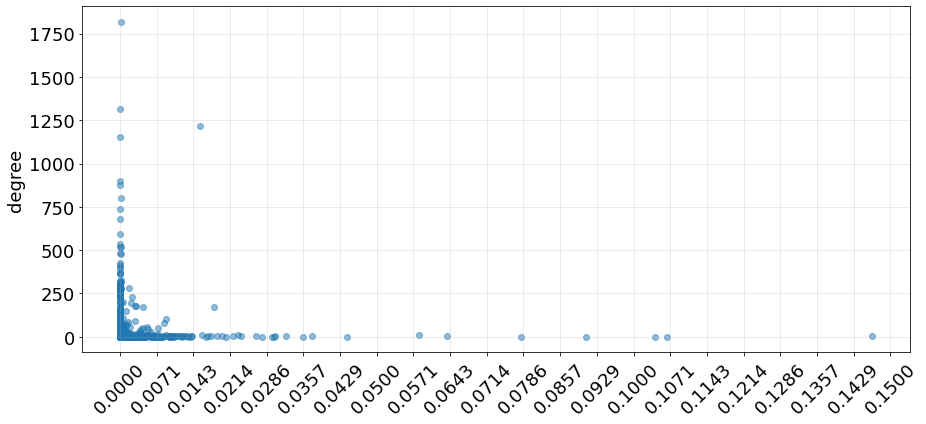

In [167]:
plt.figure(figsize=(13,6))

degrees = [ln.degree(node) for node in ln.nodes()]

plt.scatter(betw.values(), degrees, alpha=0.5)
#plt.scatter(betw.values(), degrees, alpha=0.5)
#plt.scatter(degr.values(), degrees, alpha=0.3)
    # plt.scatter(closeness, degrees, alpha=0.5)

plt.grid(b=None, alpha=0.3, which='major', axis='both')

n = len(clos)
#bins = int(n**(1/float(3)))

plt.xticks(np.linspace(0,0.15,bins), rotation=45)

#plt.xticks(np.linspace(0,max(clos.values())), rotation=45)
#plt.legend(["betweenness", "current flow betweenness"], loc='upper right', fontsize="xx-large")

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
    # plt.xlabel('centralities', fontsize=LABELSIZE)
plt.ylabel('degree', fontsize=18)
plt.tight_layout()


In [ ]:
#seleziono le chiavi dei nodi che hanno valori di betweenness più alti
selected_nodes = [ key for key, value in betw.items() if value >= 0.04]

In [170]:
#memorizzo 
dict_selected_nodes = {'node': [], 'edge_id': [],  'htlc': [], 'feebase' : [], 'feerate' : []}

for edges in G.edges(data=True):

    for n in selected_nodes:
        
        u = edges[0]
        v = edges[1]

        if n == u :
            dict_selected_nodes['node'].append(u)
            
            dict_selected_nodes['edge_id'].append(G[u][v]['ID']) 
            dict_selected_nodes['htlc'].append(G[u][v]['HTLC1']) 
            dict_selected_nodes['feebase'].append(G[u][v]['FEEBASE1'])
            dict_selected_nodes['feerate'].append(G[u][v]['FEERATE1'])

            
        elif n == v :
            dict_selected_nodes['node'].append(v)

            dict_selected_nodes['edge_id'].append(G[u][v]['ID']) 
            dict_selected_nodes['htlc'].append(G[u][v]['HTLC2']) 
            dict_selected_nodes['feebase'].append(G[u][v]['FEEBASE2'])
            dict_selected_nodes['feerate'].append(G[u][v]['FEERATE2'])

df = pd.DataFrame(data=dict_selected_nodes)


In [175]:
counter = collections.Counter(dict_selected_nodes['node']) #contiene i primi 8 nodi con valore più alto di betweenness

dict_valori_fees = {}

for n in counter:
    
    dict_valori_fees[n] = {'HTLC':[],'FEEBASE':[],'FEERATE':[]}

    for i in range(len(df)):
     #nodi selezionati

        if df.loc[i,'node'] == n :

            dict_valori_fees[n]['HTLC'].append(df.loc[i,'htlc'])
            dict_valori_fees[n]['FEEBASE'].append(df.loc[i,'feebase'])
            dict_valori_fees[n]['FEERATE'].append(df.loc[i,'feerate'])

df_values = pd.DataFrame(data=dict_valori_fees)



### distribuzioni fee applicate dai nodi con valori di betweenness più alti

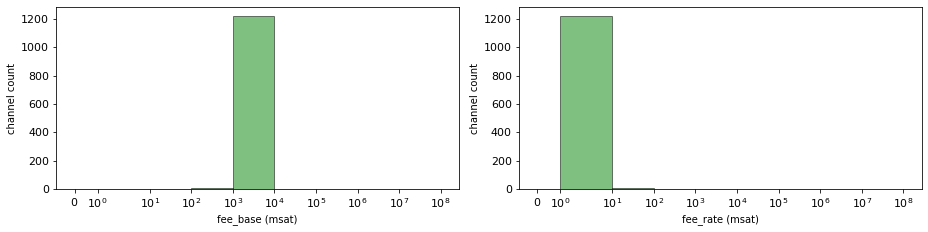

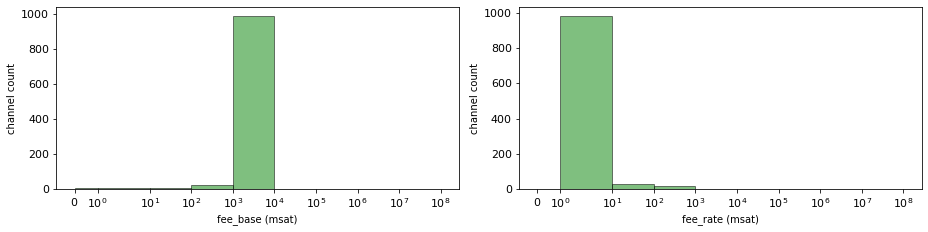

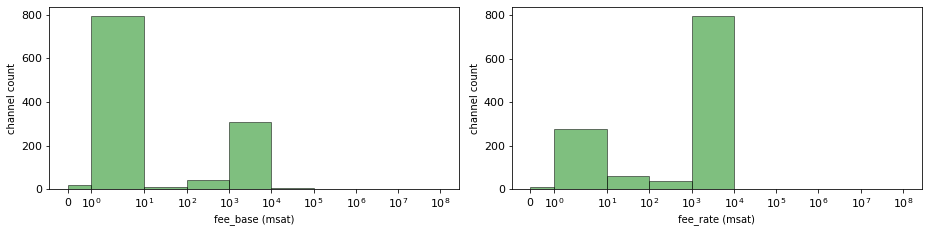

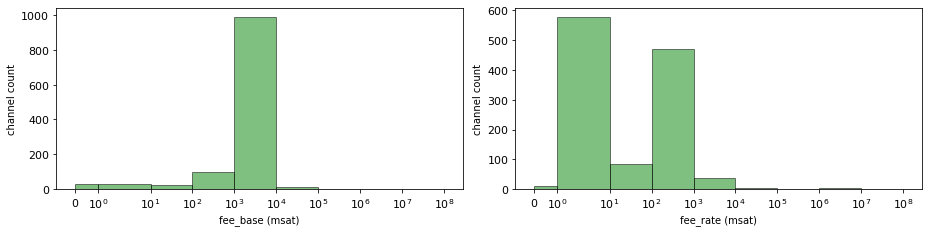

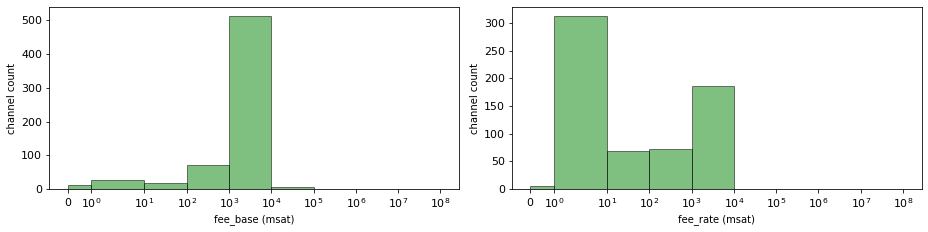

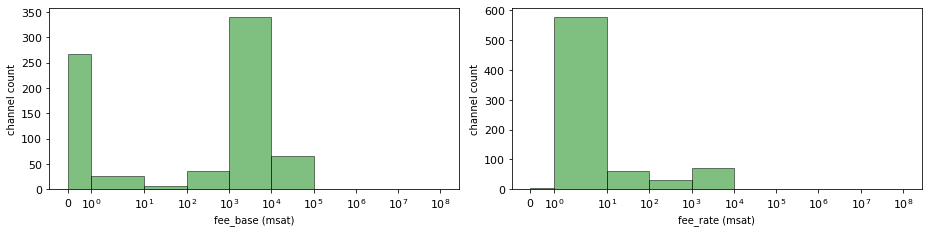

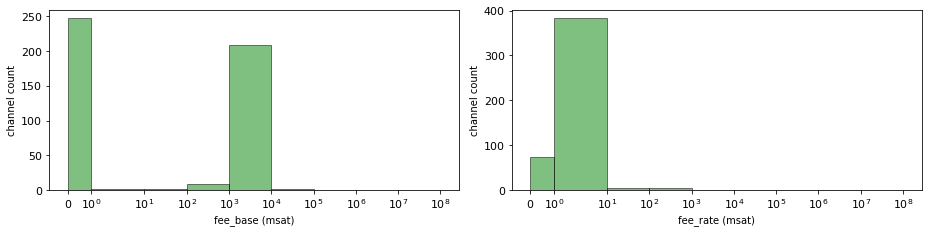

In [177]:
double_hist_fee(df_values['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266'][1],df_values['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266'][2])
double_hist_fee(df_values['0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3'][1],df_values['0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3'][2])
double_hist_fee(df_values['02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b'][1],df_values['02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b'][2])
double_hist_fee(df_values['03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f'][1],df_values['03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f'][2])
double_hist_fee(df_values['03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e'][1],df_values['03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e'][2])
double_hist_fee(df_values['0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c'][1],df_values['0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c'][2])
double_hist_fee(df_values['02315fe3619ffdea2561bcacecada87b226723f471a59fdbfec18c4e84bcf785b2'][1],df_values['02315fe3619ffdea2561bcacecada87b226723f471a59fdbfec18c4e84bcf785b2'][2])

## Analisi closeness centrality

In [24]:
clos = nx.closeness_centrality(G)


### grafico distribuzione valori di closeness centrality rispetto al grado dei nodi

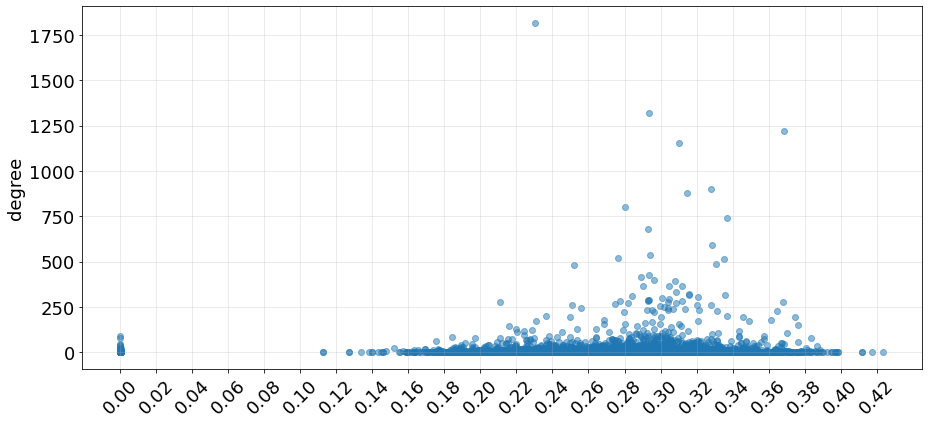

In [184]:
plt.figure(figsize=(13,6))

degrees = [ln.degree(node) for node in ln.nodes()]

plt.scatter(clos.values(), degrees, alpha=0.5)
#plt.scatter(betw.values(), degrees, alpha=0.5)
#plt.scatter(degr.values(), degrees, alpha=0.3)
    # plt.scatter(closeness, degrees, alpha=0.5)

plt.grid(b=None, alpha=0.3, which='major', axis='both')

n = len(clos)
bins = int(n**(1/float(3)))

plt.xticks(np.linspace(0,0.42,bins), rotation=45)

#plt.xticks(np.linspace(0,max(clos.values())), rotation=45)
###plt.legend(["betweenness", "current flow betweenness"], loc='upper right', fontsize="xx-large")

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
    # plt.xlabel('centralities', fontsize=LABELSIZE)
plt.ylabel('degree', fontsize=18)
plt.tight_layout()


In [201]:
#higher_closeness = [key for key, value in clos.items() if value >= 0.40 ] #ho già fatto l'analisi delle fee nella betweenness
higher_closeness = [key for key, value in clos.items() if value <= 0.02 ]


In [203]:
dict_high_clos = {'node': [], 'edge_id': [],  'htlc': [], 'feebase' : [], 'feerate' : []}

for edges in G.edges(data=True):

    for n in higher_closeness:

        u = edges[0]
        v = edges[1]

        if n == u :
            dict_high_clos['node'].append(u)
            dict_high_clos['edge_id'].append(G[u][v]['ID']) 
            dict_high_clos['htlc'].append(G[u][v]['HTLC1']) 
            dict_high_clos['feebase'].append(G[u][v]['FEEBASE1'])
            dict_high_clos['feerate'].append(G[u][v]['FEERATE1'])
            
        elif n == v :
            dict_high_clos['node'].append(v)
            dict_high_clos['edge_id'].append(G[u][v]['ID']) 
            dict_high_clos['htlc'].append(G[u][v]['HTLC2']) 
            dict_high_clos['feebase'].append(G[u][v]['FEEBASE2'])
            dict_high_clos['feerate'].append(G[u][v]['FEERATE2'])

df_clos = pd.DataFrame(data=dict_high_clos)

In [207]:
count1 = collections.Counter(dict_high_clos['node'])
#new_set = set(count)-set(counter) #considero solo i nodi "nuovi" , non quelli che ho già incontrato nell'analisi della betweenness

valori_fees_clos = {'HTLC':[],'FEEBASE':[],'FEERATE':[]}

for n in count1:
    for i in range(len(df_clos)):
     #nodi selezionati
            valori_fees_clos['HTLC'].append(df_clos.loc[i,'htlc'])
            valori_fees_clos['FEEBASE'].append(df_clos.loc[i,'feebase'])
            valori_fees_clos['FEERATE'].append(df_clos.loc[i,'feerate'])

df_valori_clos = pd.DataFrame(data=valori_fees_clos)


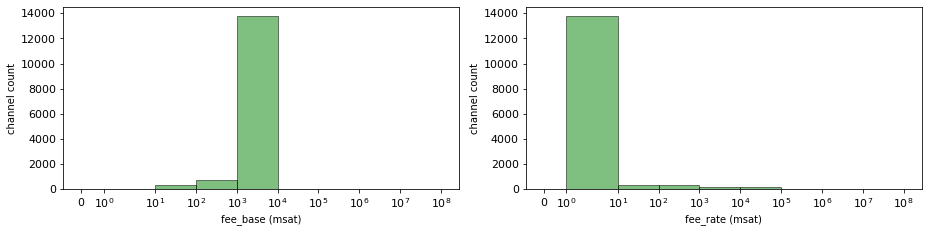

In [209]:
double_hist_fee(df_valori_clos['FEEBASE'],df_valori_clos['FEERATE']) #in linea con i risultati di tutta la rete

## Analisi degree centrality

In [25]:
degr = nx.degree_centrality(G)


### grafico distribuzione degree centrality rispetto al grado del nodo

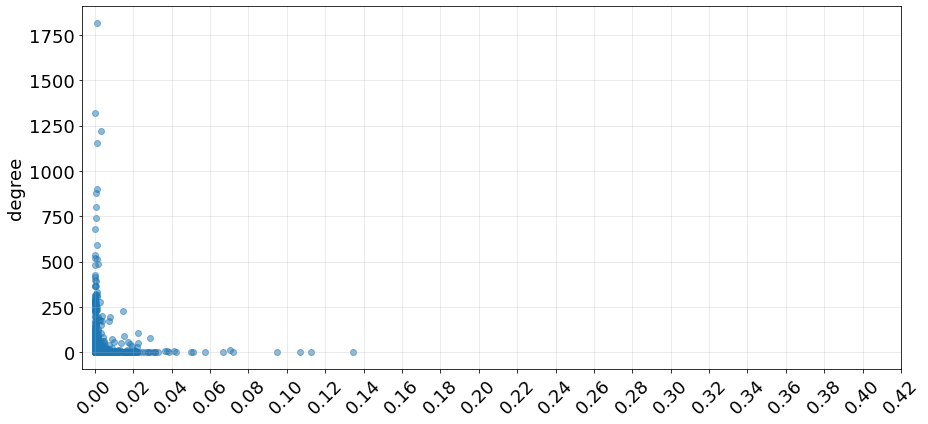

In [166]:
plt.figure(figsize=(13,6))

degrees = [ln.degree(node) for node in ln.nodes()]

plt.scatter(degr.values(), degrees, alpha=0.5)
#plt.scatter(betw.values(), degrees, alpha=0.5)
#plt.scatter(degr.values(), degrees, alpha=0.3)
    # plt.scatter(closeness, degrees, alpha=0.5)

plt.grid(b=None, alpha=0.3, which='major', axis='both')

n = len(clos)
#bins = int(n**(1/float(3)))

plt.xticks(np.linspace(0,0.42,bins), rotation=45)

#plt.xticks(np.linspace(0,max(clos.values())), rotation=45)
#plt.legend(["betweenness", "current flow betweenness"], loc='upper right', fontsize="xx-large")

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
    # plt.xlabel('centralities', fontsize=LABELSIZE)
plt.ylabel('degree', fontsize=18)
plt.tight_layout()

In [212]:
higher_degree = [key for key, value in degr.items() if value >= 0.045]
len(higher_degree)

10

In [213]:
dict_high_deg = {'node': [], 'edge_id': [],  'htlc': [], 'feebase' : [], 'feerate' : []}

for edges in G.edges(data=True):

    for n in higher_degree:

        u = edges[0]
        v = edges[1]

        if n == u :
            dict_high_deg['node'].append(u)
            dict_high_deg['edge_id'].append(G[u][v]['ID']) 
            dict_high_deg['htlc'].append(G[u][v]['HTLC1']) 
            dict_high_deg['feebase'].append(G[u][v]['FEEBASE1'])
            dict_high_deg['feerate'].append(G[u][v]['FEERATE1'])
            
        elif n == v :
            dict_high_deg['node'].append(v)
            dict_high_deg['edge_id'].append(G[u][v]['ID']) 
            dict_high_deg['htlc'].append(G[u][v]['HTLC2']) 
            dict_high_deg['feebase'].append(G[u][v]['FEEBASE2'])
            dict_high_deg['feerate'].append(G[u][v]['FEERATE2'])

df_degree = pd.DataFrame(data=dict_high_deg)



In [226]:
countd = collections.Counter(dict_high_deg['node']) #prendo solo gli ultimi due , gli altri sono già stati analizzati
display(countd)
selec = ['02004c625d622245606a1ea2c1c69cfb4516b703b47945a3647713c05fe4aaeb1c','023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23d62469060a2b2867b77f']

Counter({'0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266': 1241,
         '0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3': 1047,
         '02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b': 1179,
         '03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f': 1487,
         '03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e': 796,
         '0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c': 778,
         '03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d': 567,
         '03c2abfa93eacec04721c019644584424aab2ba4dff3ac9bdab4e9c97007491dda': 551,
         '02004c625d622245606a1ea2c1c69cfb4516b703b47945a3647713c05fe4aaeb1c': 632,
         '023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23d62469060a2b2867b77f': 735})

In [227]:

valori_fees_dg = {}

for n in selec:
    
    valori_fees_dg[n] = {'HTLC':[],'FEEBASE':[],'FEERATE':[]}

    for i in range(len(df_degree)):
     #nodi selezionati

        if df_degree.loc[i,'node'] == n :
            valori_fees_dg[n]['HTLC'].append(df_degree.loc[i,'htlc'])
            valori_fees_dg[n]['FEEBASE'].append(df_degree.loc[i,'feebase'])
            valori_fees_dg[n]['FEERATE'].append(df_degree.loc[i,'feerate'])

df_valori_dg = pd.DataFrame(data=valori_fees_dg)


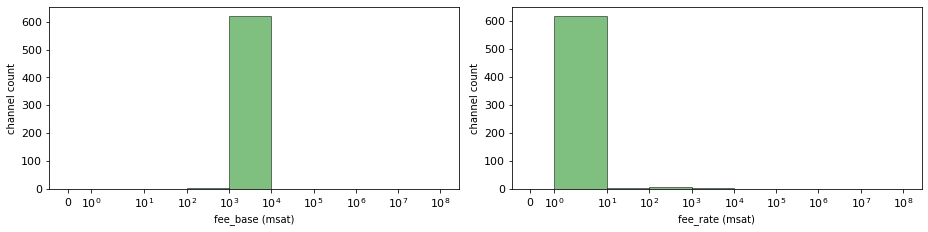

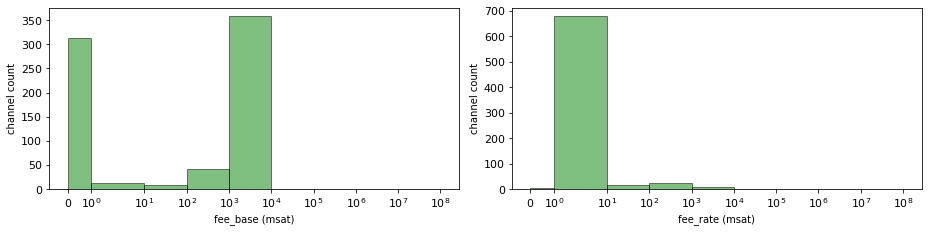

In [228]:
double_hist_fee(df_valori_dg['02004c625d622245606a1ea2c1c69cfb4516b703b47945a3647713c05fe4aaeb1c'][1],df_valori_dg['02004c625d622245606a1ea2c1c69cfb4516b703b47945a3647713c05fe4aaeb1c'][2])
double_hist_fee(df_valori_dg['023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23d62469060a2b2867b77f'][1],df_valori_dg['023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23d62469060a2b2867b77f'][2])



## Analisi eingenvector centrality

In [52]:
vect = nx.eigenvector_centrality(G)

### grafico distribuzione eigenvector_centrality rispetto al grado

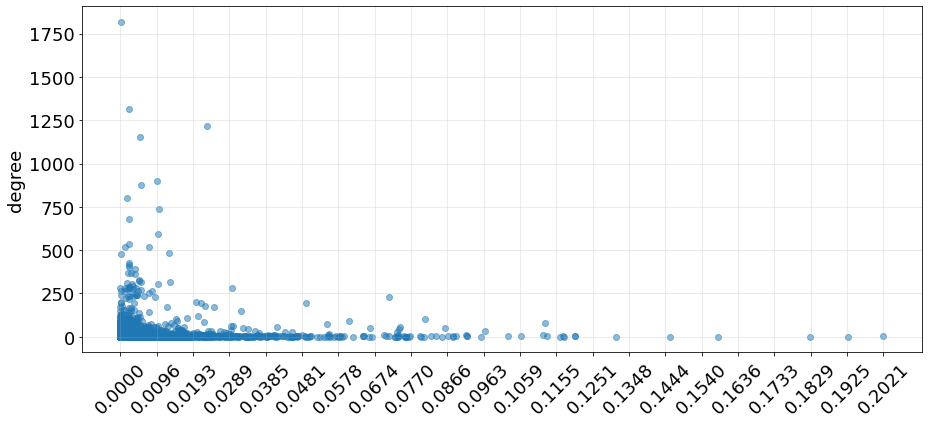

In [165]:
plt.figure(figsize=(13,6))

degrees = [ln.degree(node) for node in ln.nodes()]

plt.scatter(vect.values(), degrees, alpha=0.5)
#plt.scatter(betw.values(), degrees, alpha=0.5)
#plt.scatter(degr.values(), degrees, alpha=0.3)
    # plt.scatter(closeness, degrees, alpha=0.5)

plt.grid(b=None, alpha=0.3, which='major', axis='both')

n = len(clos)
#bins = int(n**(1/float(3)))

plt.xticks(np.linspace(0,max(vect.values()),bins), rotation=45)

#plt.xticks(np.linspace(0,max(clos.values())), rotation=45)
#plt.legend(["betweenness", loc='upper right', fontsize="xx-large")

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
    # plt.xlabel('centralities', fontsize=LABELSIZE)
plt.ylabel('degree', fontsize=18)
plt.tight_layout()


In [51]:
#salva in file
#np.save('filebetweenness.npy',betw) 

#leggi in dict
n#ew_dict = np.load('filebetweenness.npy', allow_pickle='TRUE')



In [178]:
higher_einvect = [key for key, value in vect.items() if value >= 0.11]

In [180]:
dict_high_einvect = {'node': [], 'edge_id': [],  'htlc': [], 'feebase' : [], 'feerate' : []}

for edges in G.edges(data=True):

    for n in higher_einvect:

        u = edges[0]
        v = edges[1]

        if n == u :
            dict_high_einvect['node'].append(u)
            dict_high_einvect['edge_id'].append(G[u][v]['ID']) 
            dict_high_einvect['htlc'].append(G[u][v]['HTLC1']) 
            dict_high_einvect['feebase'].append(G[u][v]['FEEBASE1'])
            dict_high_einvect['feerate'].append(G[u][v]['FEERATE1'])
            
        elif n == v :
            dict_high_einvect['node'].append(v)
            dict_high_einvect['edge_id'].append(G[u][v]['ID']) 
            dict_high_einvect['htlc'].append(G[u][v]['HTLC2']) 
            dict_high_einvect['feebase'].append(G[u][v]['FEEBASE2'])
            dict_high_einvect['feerate'].append(G[u][v]['FEERATE2'])

df_eing = pd.DataFrame(data=dict_high_einvect)



In [182]:
count = collections.Counter(dict_high_einvect['node'])
new_set = set(count)-set(counter) #considero solo i nodi "nuovi" , non quelli che ho già incontrato nell'analisi della betweenness

valori_fees = {}

for n in new_set:
    
    valori_fees[n] = {'HTLC':[],'FEEBASE':[],'FEERATE':[]}

    for i in range(len(df_eing)):
     #nodi selezionati

        if df_eing.loc[i,'node'] == n :
            valori_fees[n]['HTLC'].append(df_eing.loc[i,'htlc'])
            valori_fees[n]['FEEBASE'].append(df_eing.loc[i,'feebase'])
            valori_fees[n]['FEERATE'].append(df_eing.loc[i,'feerate'])

df_valori = pd.DataFrame(data=valori_fees)


### grafici distribuzioni fee imposte dai nodi con higher eingenvector

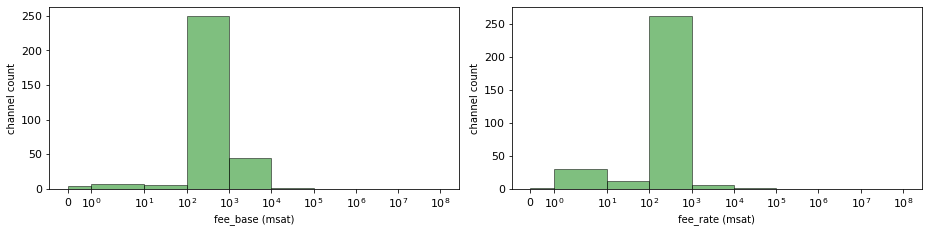

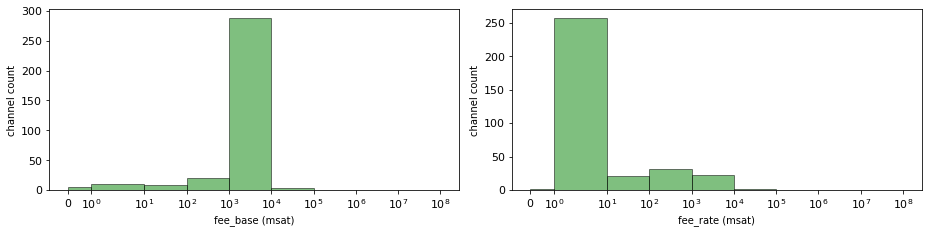

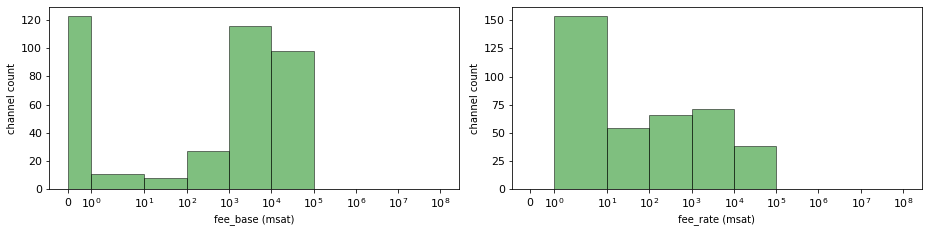

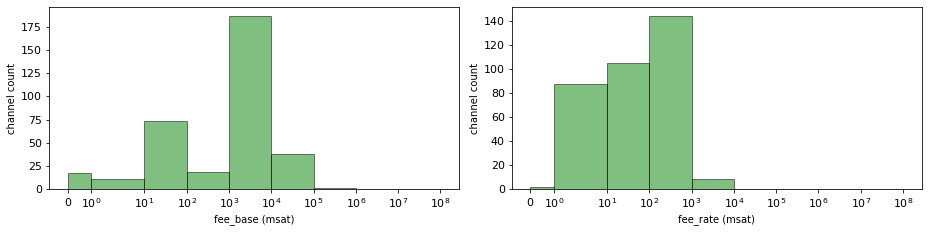

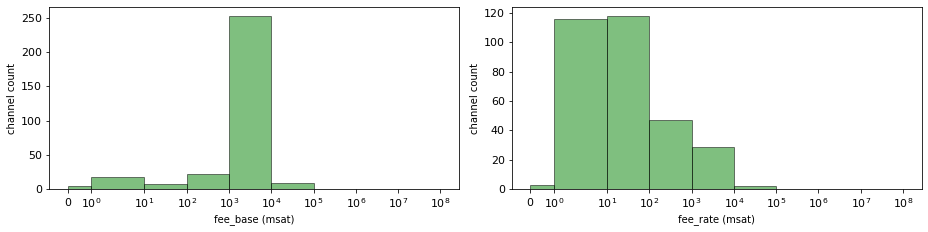

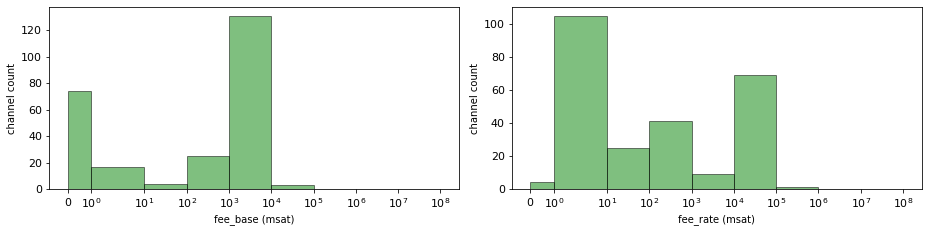

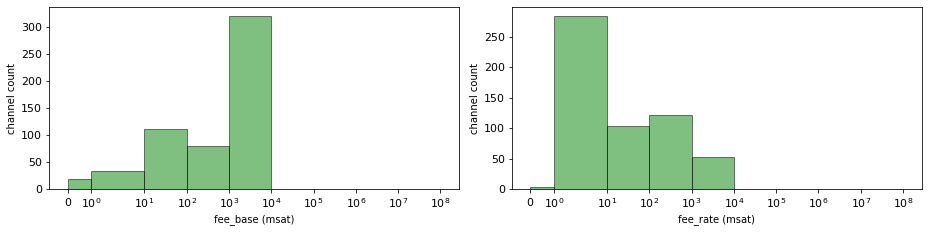

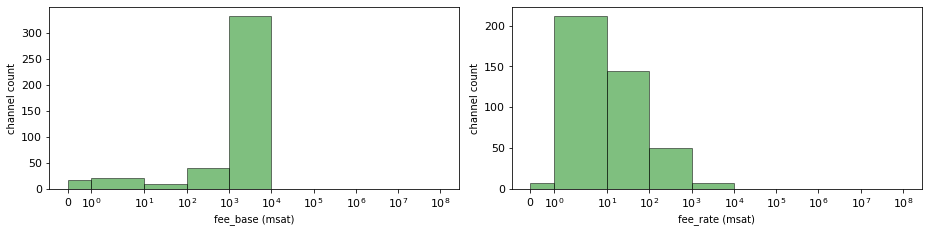

In [183]:
double_hist_fee(df_valori['021607cfce19a4c5e7e6e738663dfafbbbac262e4ff76c2c9b30dbeefc35c00643'][1],df_valori['021607cfce19a4c5e7e6e738663dfafbbbac262e4ff76c2c9b30dbeefc35c00643'][2])
double_hist_fee(df_valori['0260fab633066ed7b1d9b9b8a0fac87e1579d1709e874d28a0d171a1f5c43bb877'][1],df_valori['0260fab633066ed7b1d9b9b8a0fac87e1579d1709e874d28a0d171a1f5c43bb877'][2])
double_hist_fee(df_valori['0298f6074a454a1f5345cb2a7c6f9fce206cd0bf675d177cdbf0ca7508dd28852f'][1],df_valori['0298f6074a454a1f5345cb2a7c6f9fce206cd0bf675d177cdbf0ca7508dd28852f'][2])
double_hist_fee(df_valori['02a04446caa81636d60d63b066f2814cbd3a6b5c258e3172cbdded7a16e2cfff4c'][1],df_valori['02a04446caa81636d60d63b066f2814cbd3a6b5c258e3172cbdded7a16e2cfff4c'][2])
double_hist_fee(df_valori['033d8656219478701227199cbd6f670335c8d408a92ae88b962c49d4dc0e83e025'][1],df_valori['033d8656219478701227199cbd6f670335c8d408a92ae88b962c49d4dc0e83e025'][2])
double_hist_fee(df_valori['039c73f53daad1050a6a72afb5353a2152f3152ee17168cd0ab28c2cb3e0050e36'][1],df_valori['039c73f53daad1050a6a72afb5353a2152f3152ee17168cd0ab28c2cb3e0050e36'][2])
double_hist_fee(df_valori['03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d'][1],df_valori['03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d'][2])
double_hist_fee(df_valori['03c2abfa93eacec04721c019644584424aab2ba4dff3ac9bdab4e9c97007491dda'][1],df_valori['03c2abfa93eacec04721c019644584424aab2ba4dff3ac9bdab4e9c97007491dda'][2])

In [229]:
countt = collections.Counter(dict_high_einvect['node'])
new_set = set(count)-set(counter) #considero solo i nodi "nuovi" , non quelli che ho già incontrato nell'analisi della betweenness

valori_feess = {'HTLC':[],'FEEBASE':[],'FEERATE':[]}

for n in new_set:

    for i in range(len(df_eing)):
     #nodi selezionati

        if df_eing.loc[i,'node'] == n :
            valori_feess['HTLC'].append(df_eing.loc[i,'htlc'])
            valori_feess['FEEBASE'].append(df_eing.loc[i,'feebase'])
            valori_feess['FEERATE'].append(df_eing.loc[i,'feerate'])

df_valori_feess = pd.DataFrame(data=valori_feess)


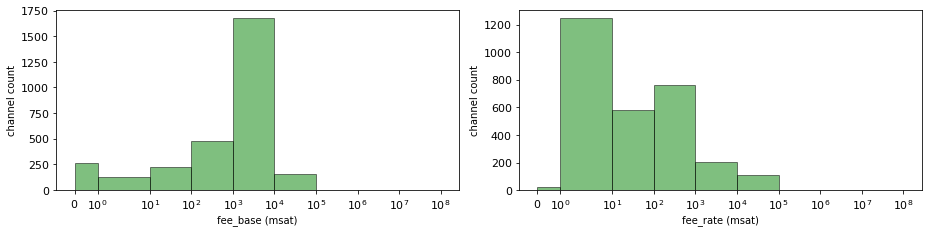

In [230]:
#double_hist_fee(df_valori_feess['FEEBASE'],df_valori_feess['FEERATE'])

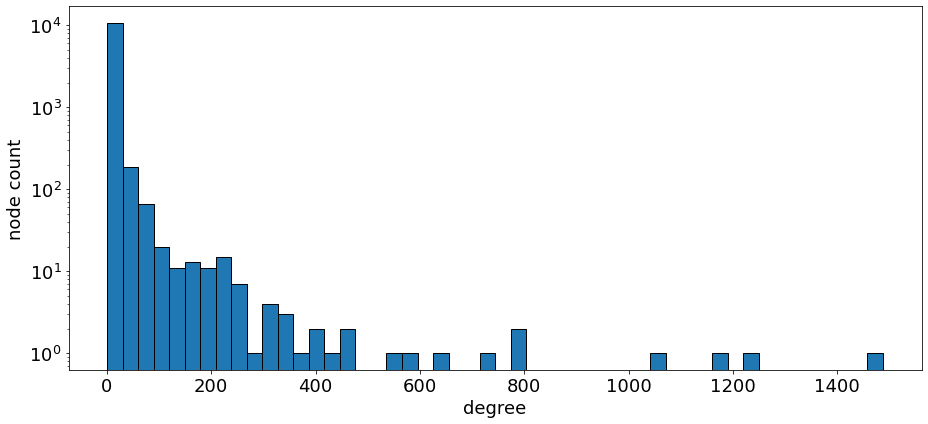

In [116]:
    #istogramma: distribuzione del grado dei nodi
    #gradi dei nodi della LN passata come argomento
    degrees = [G.degree(node) for node in G.nodes()]

    n = len(degrees)
    bins=50
    
    plt.figure(figsize=(13,6))
    plt.tick_params(axis='x', labelsize=18)
    plt.tick_params(axis='y', labelsize=18)
    plt.xlabel('degree', fontsize=18)
    plt.ylabel('node count',fontsize=18)
    plt.yscale('log')
    plt.hist(degrees, bins = bins, edgecolor = 'black')
    plt.tight_layout()
    plt.savefig("degrees.png")

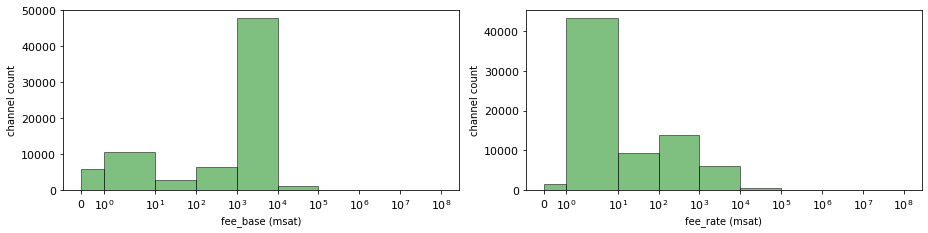

In [115]:
plt.figure(figsize=(13,6))
a1 = plt.subplot(2,2,1)
a1.tick_params(axis='x', labelsize=11)
a1.tick_params(axis='y', labelsize=11)
plt.xlabel('fee_base (msat)', fontsize=10)
plt.ylabel('channel count',fontsize=10)
#plt.yscale('log')
plt.xscale('symlog')
a1.hist(feebase, bins = [0,1,10,100,1000,10000,100000,1000000,10000000,100000000], alpha = 0.5, edgecolor ='black', color = 'green')
plt.tight_layout()


a2=plt.subplot(2, 2, 2)
a2.tick_params(axis='x', labelsize=11)
a2.tick_params(axis='y', labelsize=11)
plt.xlabel('fee_rate (msat)', fontsize=10)
plt.ylabel('channel count',fontsize=10)
#plt.yscale('log')
plt.xscale('symlog')
a2.hist(feerate, bins = [0,1,10,100,1000,10000,100000,1000000,10000000,100000000], alpha = 0.5, edgecolor ='black', color = 'green')
plt.tight_layout()

plt.savefig("fees_all.png")



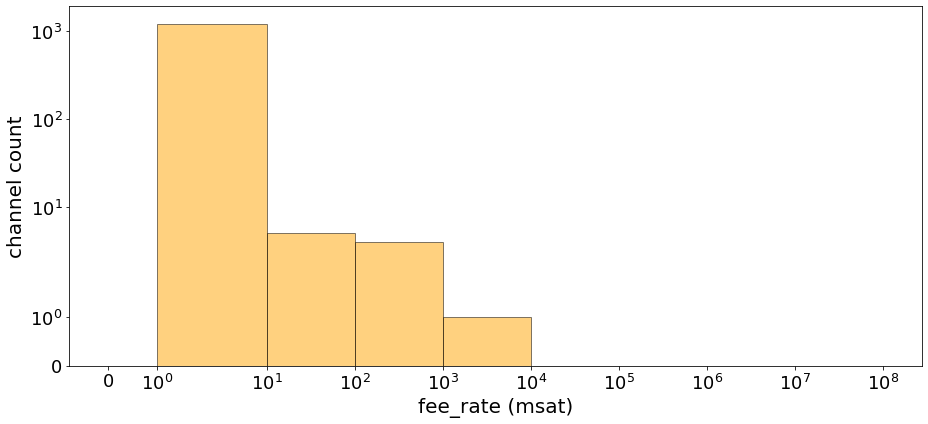

In [79]:
feerate_distribution(df_values['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266'][2])

In [92]:
h,a = nx.hits(G)

ModuleNotFoundError: No module named 'scipy'

# ***ANALISI CAMPO ROUTING***


### ***def*** : se ROUTING = 1 il nodo consente il routing, se = -1 il routing non è consentito

In [3]:
#canali su cui non avvengono inoltri su in nessuna delle due direzioni
channels_two_not = [d['CHANNELID'] for u,v,d in ln.edges.data() if d['ROUTING1'] == 0 and d['ROUTING2'] == 0]
#canali su cui avvengono inoltri su in una direzione
channels_one_not = [d['CHANNELID'] for u,v,d in ln.edges.data() if d['ROUTING1'] == 0 or d['ROUTING2'] == 0]

display(len(channels_two_not))
display(len(channels_one_not))


1524

12043

In [4]:
#creo il sottografo solo con i canali su cui vengono inoltrati i pagamenti in entrambe le direzioni

subgraph = nx.MultiGraph(data=True)

nodes_set = set()
edges = []

for u,v,d in ln.edges(data=True):
    if d['CHANNELID'] not in channels_two_not:
        edges.append((u,v,d))

for (u,v,d) in edges:
    nodes_set.add(u)
    nodes_set.add(v)
nodes = list(nodes_set)


subgraph.add_edges_from(edges)
subgraph.add_nodes_from(nodes)

nx.write_gml(subgraph, "output\grafi\multigraforouting.gml")


In [18]:
#htlc1_sub = [d['MINHTLC1'] for u,v,d in subgraph.edges.data() if d['ROUTING1'] == 0]
#htlc2_sub = [d['MINHTLC2'] for u,v,d in subgraph.edges.data() if d['ROUTING2'] == 0]
htlc1_sub = [int(c) for (u, v, c) in subgraph.edges.data('MINHTLC1')]
htlc2_sub = [int(c) for (u, v, c) in subgraph.edges.data('MINHTLC2')]
htlc_sub2 = htlc1_sub+htlc2_sub 
feebase1_sub = [c for (u, v, c) in subgraph.edges.data('FEEBASE1')]
feebase2_sub = [c for (u, v, c) in subgraph.edges.data('FEEBASE2')]
feebase_sub2 = feebase1_sub + feebase2_sub
feerate1_sub = [int(c) for (u, v, c) in subgraph.edges.data('FEERATE1')]
feerate2_sub = [int(c) for (u, v, c) in subgraph.edges.data('FEERATE2')]
feerate_sub2 = feerate1_sub + feerate2_sub

In [19]:
len(htlc_sub2)

82900

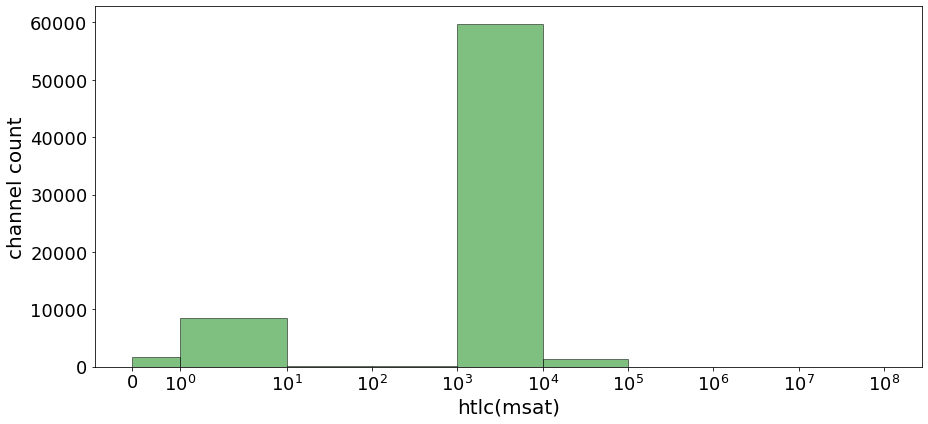

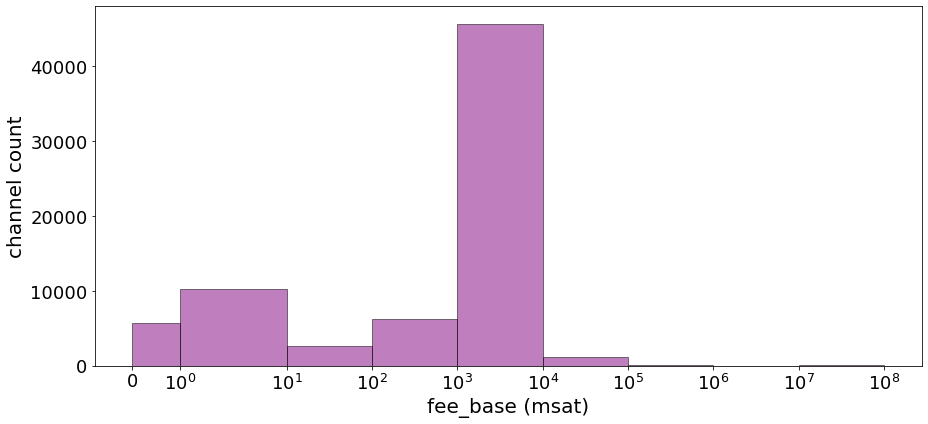

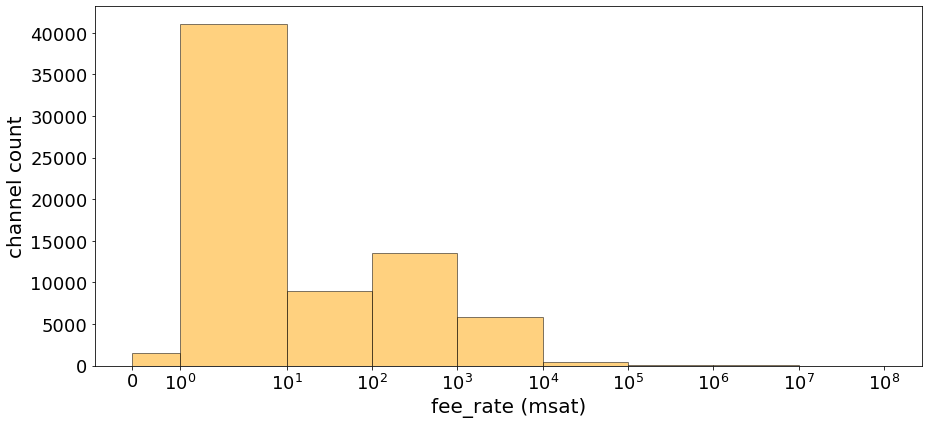

In [13]:
htlc_distribution(htlc_sub2)
feebase_distribution(feebase_sub2)
feerate_distribution(feerate_sub2)

In [36]:
#creo il sottografo solo con i canali su cui vengono inoltrati i pagamenti in una sola direzione

subgraph2 = nx.MultiGraph(data=True)

nodes_set = set()
edges = []

for u,v,d in ln.edges(data=True):
    if d['CHANNELID'] in channels_one_not:
        edges.append((u,v,d))

for (u,v,d) in edges:
    nodes_set.add(u)
    nodes_set.add(v)
nodes = list(nodes_set)


subgraph2.add_edges_from(edges)
subgraph2.add_nodes_from(nodes)

nx.write_gml(subgraph2, "output\grafi\multigraforouting2.gml")

In [43]:
htlc1_sub2 = [d['MINHTLC1'] for u,v,d in subgraph.edges.data() if d['ROUTING1'] == 0]
htlc2_sub2 = [d['MINHTLC2'] for u,v,d in subgraph.edges.data() if d['ROUTING2'] == 0 ]
htlc_sub2 = htlc1_sub2+htlc2_sub2
feebase1_sub2 = [d['FEEBASE1'] for u,v,d in subgraph.edges.data() if d['ROUTING1'] == 0]
feebase2_sub2 = [d['FEEBASE2'] for u,v,d in subgraph.edges.data() if d['ROUTING2'] == 0]
feebase_sub2 = feebase1_sub2 + feebase2_sub2
feerate1_sub2 = [int(d['FEERATE1']) for u,v,d in subgraph.edges.data() if d['ROUTING1'] == 0]
feerate2_sub2 = [int(d['FEERATE2']) for u,v,d in subgraph.edges.data() if d['ROUTING2'] == 0]
feerate_sub2 = feerate1_sub2 + feerate2_sub2

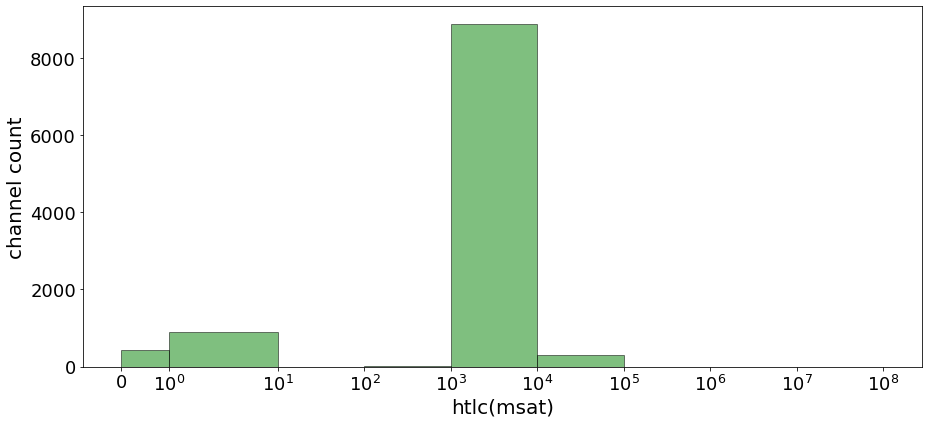

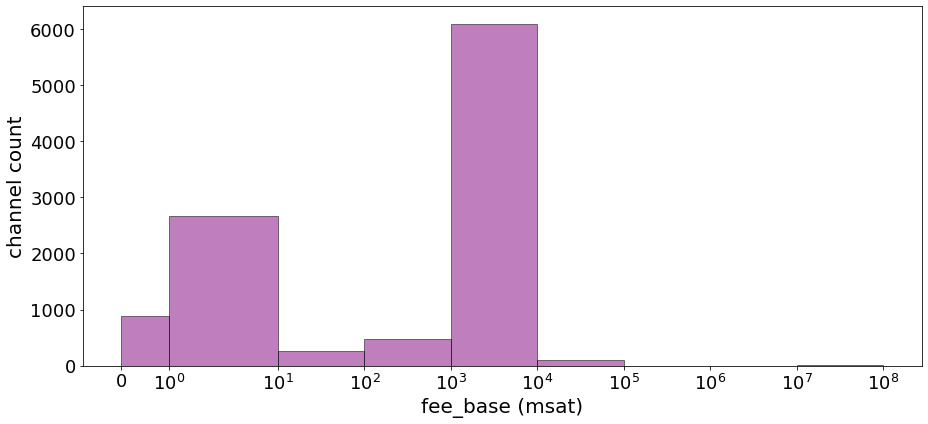

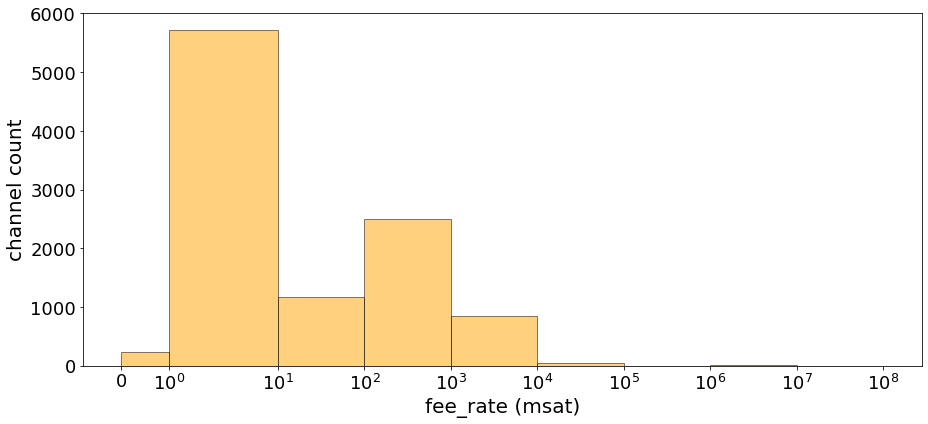

In [44]:
htlc_distribution(htlc_sub2)
feebase_distribution(feebase_sub2)
feerate_distribution(feerate_sub2)